## Contents

This script offers an overview of data distribution across 399 entries to the database on participatory practices and social innovations in the context of wind energy developments.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math

### 1. Importing Data

In [2]:
#creating a path
path= r'C:\Users\isobr\OneDrive\18042023ParticipationPractices'

In [3]:
path

'C:\\Users\\isobr\\OneDrive\\18042023ParticipationPractices'

In [4]:
#importing the excel dataset
df = pd.read_excel(os.path.join(path, 'practices_full.xlsx'), index_col = False)

In [5]:
df.head()

,ID,title,CS,source,year_pub,year_pro,publisher,link,province_state,country,...,innovation,tax,new jobs,tourism,energy price,property price,livelihoods,eco_imp,imp_score,perceived_imp
0,a1,Popular and institutional opposition to the Se...,yes,Wiki,2022,2021.0,EJ Atlas,https://ejatlas.org/conflict/popular-and-insti...,Catalonia,Spain,...,0,0,1,1,0,0,0,2,6,Moderate negative
1,a2,Proteste gegen Verspargelung und Flächenfraß,yes,News media,2019,2019.0,deutschlandfunk Kultur,https://www.deutschlandfunkkultur.de/windenerg...,Mecklenburg-Western Pomerania,Germany,...,0,0,0,0,0,0,0,0,3,Moderate negative
2,a3,Greta Thunberg has joined a protest against wi...,yes,News media,2023,2021.0,CNN,https://edition.cnn.com/2023/03/01/europe/gret...,Fosen,Norway,...,0,0,0,0,0,0,0,0,3,Moderate negative
3,a4,"Combining offshore wind farms, nature conserva...",no,Journal article,2021,2021.0,Marine Policy,https://www.sciencedirect.com/science/article/...,Not Applicable,Netherlands,...,0,0,1,0,0,0,0,1,4,Neutral
4,a5,Learning from the social impacts associated wi...,yes,Journal article,2021,2008.0,Impact Assessment and Project Appraisal,https://www.tandfonline.com/doi/full/10.1080/1...,Urk,Netherlands,...,1,0,0,1,0,0,1,3,6,Moderate negative


In [6]:
df.shape

(399, 70)

In [7]:
df.columns

Index(['ID', 'title', 'CS', 'source', 'year_pub', 'year_pro', 'publisher',
       'link', 'province_state', 'country', 'region', 'technology',
       'n_turbines', 'capacity', 'local community', 'communities interest',
       'public', 'small investors', 'cooperative', 'NGO', 'organisation',
       'government', 'municipality', 'experts', 'investors', 'turbines',
       'onshore farm', 'offshore farm', 'company', 'policy', 'community ',
       'repowering', 'other', 'mandate', 'main_level', 'level_score',
       'other_levels', 'alibi', 'resistance', 'information', 'consultation ',
       'financial ', 'cooperation ', 'scale', 'timing', 'opportunities',
       'opportunities_score', 'noise', 'shadow-flicker', 'safety', 'health',
       'landuse', 'access energy', 'awareness', 'community fund', 'soc_imp',
       'emissions', 'biodiversity', 'landscape', 'env_imp', 'innovation',
       'tax', 'new jobs', 'tourism', 'energy price', 'property price',
       'livelihoods', 'eco_imp', 'imp_s

### 2. Check for Duplicates and Null values

In [8]:
#Checking for duplicates
df_dup = df[df.duplicated()]

In [9]:
df_dup

,ID,title,CS,source,year_pub,year_pro,publisher,link,province_state,country,...,innovation,tax,new jobs,tourism,energy price,property price,livelihoods,eco_imp,imp_score,perceived_imp


In [10]:
df.isna().sum() 

ID                0
title             0
CS                0
source            0
year_pub          0
                 ..
property price    0
livelihoods       0
eco_imp           0
imp_score         0
perceived_imp     0
Length: 70, dtype: int64

### 3. Check Data Types

In [11]:
#checking for variables with mixed data types
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

other_levels
alibi
resistance
information
consultation 
financial 
cooperation 


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 70 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    399 non-null    object 
 1   title                 399 non-null    object 
 2   CS                    399 non-null    object 
 3   source                399 non-null    object 
 4   year_pub              399 non-null    int64  
 5   year_pro              382 non-null    float64
 6   publisher             399 non-null    object 
 7   link                  399 non-null    object 
 8   province_state        399 non-null    object 
 9   country               399 non-null    object 
 10  region                399 non-null    object 
 11  technology            399 non-null    object 
 12  n_turbines            399 non-null    int64  
 13  capacity              399 non-null    float64
 14  local community       399 non-null    int64  
 15  communities interest  3

### 4. Exploratory Analysis

In [13]:
#frequency of country
df['country'].value_counts().sort_values(ascending = True)

Turkey                 1
Ukraine                1
Ethiopia               1
American Samoa         1
Lithuania              1
Luxembourg             1
Kenya                  1
Albania                1
Dominican Republic     1
Colombia               1
Equador                1
Taiwan                 1
Mozambique             1
China                  2
Pakistan               2
Latvia                 2
Sweden                 2
Iceland                2
Czech Republic         2
South Korea            4
Austria                4
Finland                4
Switzerland            5
Europe                 5
South Africa           6
India                  6
France                 6
Greece                 7
Ireland                8
Portugal               8
Estonia                9
Mexico                 9
Poland                 9
Brazil                10
Australia             10
Norway                10
Italy                 10
Canada                13
Spain                 18
Not Applicable        19


In [14]:
#unique values in country
df['country'].unique()

array(['Spain', 'Germany', 'Norway', 'Netherlands', 'United Kingdom',
       'Not Applicable', 'Pakistan', 'South Korea', 'Greece', 'Italy',
       'United States ', 'Brazil', 'South Africa', 'Mexico', 'China',
       'Ethiopia', 'Ireland', 'Switzerland', 'Estonia', 'Ukraine',
       'Poland', 'Europe', 'Finland', 'Iceland', 'Latvia', 'Lithuania',
       'Portugal', 'Australia', 'Sweden', 'Denmark', 'Belgium', 'Albania',
       'Austria', 'Kenya', 'Canada', 'France', 'American Samoa', 'India',
       'Luxembourg', 'Taiwan', 'Czech Republic', 'Dominican Republic',
       'Colombia', 'Equador', 'Mozambique', 'Turkey '], dtype=object)

#### 4.1 Group By 

In [15]:
df.groupby(['main_level', 'mandate'])['n_turbines'].count()

main_level        mandate          
Alibi             Legal Obligation      3
                  Not applicable        2
Consultation      Legal Obligation     38
                  Not applicable       16
                  Voluntary            70
Cooperation       Legal Obligation      2
                  Not applicable        4
                  Voluntary            58
Financial         Legal Obligation     11
                  Not applicable        3
                  Voluntary            73
Information       Legal Obligation     21
                  Not applicable        5
                  Voluntary            29
No participation  Not applicable       14
Resistance        Legal Obligation      4
                  Not applicable        1
                  Voluntary            45
Name: n_turbines, dtype: int64

In [16]:
df.groupby(['main_level', 'scale'])['n_turbines'].count()

main_level        scale        
Alibi             Local             1
                  National          2
                  Regional          2
Consultation      Local            52
                  National         32
                  Regional         33
                  Transnational     7
Cooperation       Local            37
                  National          6
                  Regional         20
                  Transnational     1
Financial         Local            41
                  National         17
                  Regional         21
                  Transnational     8
Information       Local            14
                  National         21
                  Regional         16
                  Transnational     4
No participation  Local             6
                  National          2
                  Regional          4
                  Transnational     2
Resistance        Local            23
                  National          7
                  

On a first view, it seems that Consultation, Cooperation and Financial levels of Participation happen mostly at the local level

#### 4.1.1 Main Level of Participation and Installed Capacity

In [17]:
df.groupby('main_level')['capacity'].mean()

main_level
Alibi               4451.000000
Consultation         857.657258
Cooperation          499.015938
Financial            323.488621
Information          462.779509
No participation     225.925000
Resistance          4587.589400
Name: capacity, dtype: float64

In [18]:
df3 = (
    df
    .groupby('main_level')['capacity'].mean()
    .reset_index()
    .sort_values('capacity', ascending = False)
)
df3

,main_level,capacity
6,Resistance,4587.589400
0,Alibi,4451.000000
1,Consultation,857.657258
2,Cooperation,499.015938
4,Information,462.779509
3,Financial,323.488621
5,No participation,225.925000


In [19]:
#creating a new index based on the level of participation
df3.set_index('main_level')

,capacity
main_level,
Resistance,4587.589400
Alibi,4451.000000
Consultation,857.657258
Cooperation,499.015938
Information,462.779509
Financial,323.488621
No participation,225.925000


Text(0.5, 1.0, 'Main Level of Participation by Mean Value of Installed Capacity')

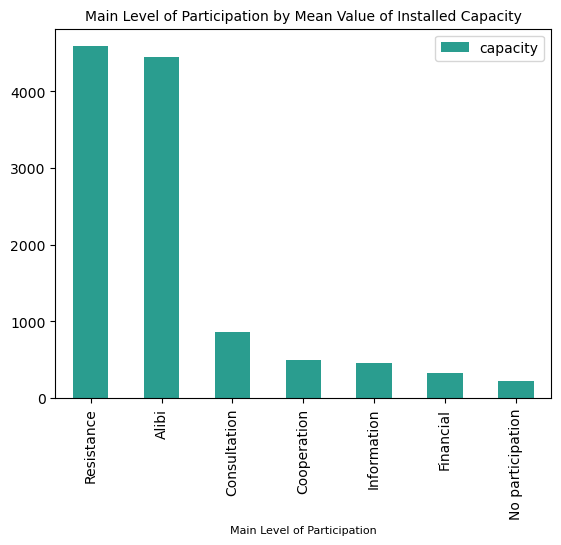

In [20]:
df3.set_index('main_level').plot.bar(color='#2a9d8f')
plt.xlabel('Main Level of Participation', fontsize=8)
plt.title('Main Level of Participation by Mean Value of Installed Capacity', fontsize=10)

In [57]:
df['capacity'].describe()

count       399.000000
mean       1119.499556
std        8144.914914
min           0.000000
25%           0.950000
50%          34.850000
75%         190.000000
max      141000.000000
Name: capacity, dtype: float64

Higher installed capacity has less entries for cooperation and financial, and more for alibi and resistance.

Now lets consider the number of turbines (which is highly correlated to installed capacity):

In [21]:
df['n_turbines'].describe()

count      399.000000
mean       432.726817
std       3308.817452
min          0.000000
25%          1.000000
50%         10.000000
75%         73.000000
max      56400.000000
Name: n_turbines, dtype: float64

In [22]:
df.groupby('main_level')['n_turbines'].mean()

main_level
Alibi               2614.000000
Consultation         235.741935
Cooperation          155.937500
Financial            134.942529
Information          179.236364
No participation      96.785714
Resistance          1948.460000
Name: n_turbines, dtype: float64

In [23]:
df2 = (
    df
    .groupby('main_level')['n_turbines'].median()
    .reset_index()
    .sort_values('n_turbines', ascending = False)
)

In [24]:
df2.set_index('main_level')

,n_turbines
main_level,
Alibi,1315.0
Information,40.0
Resistance,25.0
Consultation,11.0
No participation,8.0
Cooperation,4.5
Financial,4.0


Text(0.5, 1.0, 'Main Level of Participation by Median Number of Turbines')

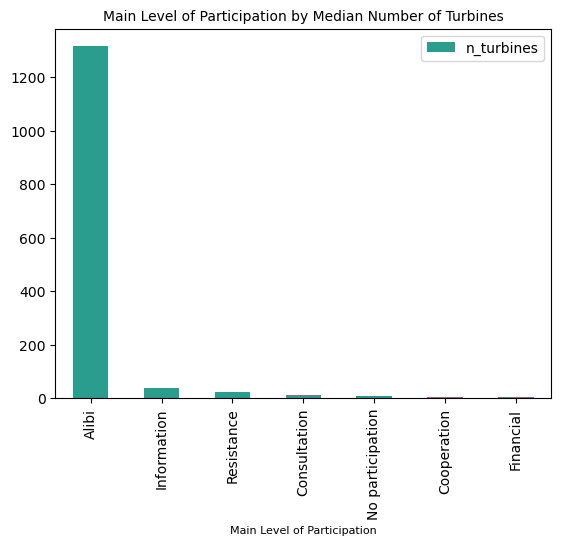

In [25]:
df2.set_index('main_level').plot.bar(color='#2a9d8f')
plt.xlabel('Main Level of Participation', fontsize=8)
plt.title('Main Level of Participation by Median Number of Turbines',fontsize=10)

The result is very similar for number of turbines (statistical tests will say further, if this relationship is significant)

### 5. Descriptive Statistics

In [26]:
df.describe()

,year_pub,year_pro,n_turbines,capacity,local community,communities interest,public,small investors,cooperative,NGO,...,env_imp,innovation,tax,new jobs,tourism,energy price,property price,livelihoods,eco_imp,imp_score
count,399.000000,382.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,...,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,2019.982456,2014.960733,432.726817,1119.499556,0.543860,0.433584,0.315789,0.195489,0.235589,0.122807,...,1.197995,0.223058,0.052632,0.265664,0.075188,0.250627,0.050125,0.215539,1.132832,3.619048
std,3.674193,6.594440,3308.817452,8144.914914,0.498698,0.496191,0.465413,0.397074,0.424899,0.328628,...,0.958116,0.416819,0.223577,0.442241,0.264025,0.433918,0.218477,0.411712,1.009950,1.868877
min,2000.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,2012.000000,1.000000,0.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2021.000000,2016.000000,10.000000,34.850000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
75%,2023.000000,2020.000000,73.000000,190.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,2.000000,5.000000
max,2023.000000,2029.000000,56400.000000,141000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,10.000000


In [27]:
# checking the columns
df.columns

Index(['ID', 'title', 'CS', 'source', 'year_pub', 'year_pro', 'publisher',
       'link', 'province_state', 'country', 'region', 'technology',
       'n_turbines', 'capacity', 'local community', 'communities interest',
       'public', 'small investors', 'cooperative', 'NGO', 'organisation',
       'government', 'municipality', 'experts', 'investors', 'turbines',
       'onshore farm', 'offshore farm', 'company', 'policy', 'community ',
       'repowering', 'other', 'mandate', 'main_level', 'level_score',
       'other_levels', 'alibi', 'resistance', 'information', 'consultation ',
       'financial ', 'cooperation ', 'scale', 'timing', 'opportunities',
       'opportunities_score', 'noise', 'shadow-flicker', 'safety', 'health',
       'landuse', 'access energy', 'awareness', 'community fund', 'soc_imp',
       'emissions', 'biodiversity', 'landscape', 'env_imp', 'innovation',
       'tax', 'new jobs', 'tourism', 'energy price', 'property price',
       'livelihoods', 'eco_imp', 'imp_s

In [28]:
df.describe(include = 'all') 

,ID,title,CS,source,year_pub,year_pro,publisher,link,province_state,country,...,innovation,tax,new jobs,tourism,energy price,property price,livelihoods,eco_imp,imp_score,perceived_imp
count,399,399,399,399,399.000000,382.000000,399,399,399,399,...,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399
unique,399,387,2,8,NaN,NaN,166,343,234,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,a1,Horns Rev Offshore wind farm,yes,Journal article,NaN,NaN,Cordis Europe,https://vbn.aau.dk/en/publications/final-repor...,Not Applicable,United Kingdom,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderate positive
freq,1,4,319,145,NaN,NaN,64,5,103,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165
mean,NaN,NaN,NaN,NaN,2019.982456,2014.960733,NaN,NaN,NaN,NaN,...,0.223058,0.052632,0.265664,0.075188,0.250627,0.050125,0.215539,1.132832,3.619048,NaN
std,NaN,NaN,NaN,NaN,3.674193,6.594440,NaN,NaN,NaN,NaN,...,0.416819,0.223577,0.442241,0.264025,0.433918,0.218477,0.411712,1.009950,1.868877,NaN
min,NaN,NaN,NaN,NaN,2000.000000,1980.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,2019.000000,2012.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,NaN
50%,NaN,NaN,NaN,NaN,2021.000000,2016.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,NaN
75%,NaN,NaN,NaN,NaN,2023.000000,2020.000000,NaN,NaN,NaN,NaN,...,0.000000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,2.000000,5.000000,NaN


In [29]:
df['region'].value_counts().sort_values(ascending = True)

Africa              9
Australia          11
Asia               16
South America      21
Not Applicable     22
Eastern Europe     25
Southern Europe    43
Central Europe     44
North America      54
Western Europe     65
Northern Europe    89
Name: region, dtype: int64

In [30]:
#frequency of scale
df['scale'].value_counts(normalize=True)

Local            0.436090
Regional         0.288221
National         0.218045
Transnational    0.057644
Name: scale, dtype: float64

In [31]:
df['source'].value_counts(normalize=True)

Journal article          0.363409
Community website        0.180451
Report –  EU project     0.142857
Wiki                     0.140351
News media               0.065163
Blog post                0.050125
Report – other           0.037594
Thesis                   0.020050
Name: source, dtype: float64

In [32]:
df['technology'].value_counts(normalize=True)

Onshore Wind        0.711779
Offshore Wind       0.150376
Not Applicable      0.062657
Small Wind          0.040100
On and Offshore     0.035088
Name: technology, dtype: float64

In [33]:
df['mandate'].value_counts()

Voluntary            275
Legal Obligation      79
Not applicable        45
Name: mandate, dtype: int64

In [34]:
df['main_level'].value_counts()

Consultation        124
Financial            87
Cooperation          64
Information          55
Resistance           50
No participation     14
Alibi                 5
Name: main_level, dtype: int64

array([[<AxesSubplot:title={'center':'year_pub'}>,
        <AxesSubplot:title={'center':'year_pro'}>,
        <AxesSubplot:title={'center':'n_turbines'}>,
        <AxesSubplot:title={'center':'capacity'}>,
        <AxesSubplot:title={'center':'local community'}>,
        <AxesSubplot:title={'center':'communities interest'}>,
        <AxesSubplot:title={'center':'public'}>],
       [<AxesSubplot:title={'center':'small investors'}>,
        <AxesSubplot:title={'center':'cooperative'}>,
        <AxesSubplot:title={'center':'NGO'}>,
        <AxesSubplot:title={'center':'organisation'}>,
        <AxesSubplot:title={'center':'government'}>,
        <AxesSubplot:title={'center':'municipality'}>,
        <AxesSubplot:title={'center':'experts'}>],
       [<AxesSubplot:title={'center':'investors'}>,
        <AxesSubplot:title={'center':'turbines'}>,
        <AxesSubplot:title={'center':'onshore farm'}>,
        <AxesSubplot:title={'center':'offshore farm'}>,
        <AxesSubplot:title={'center':

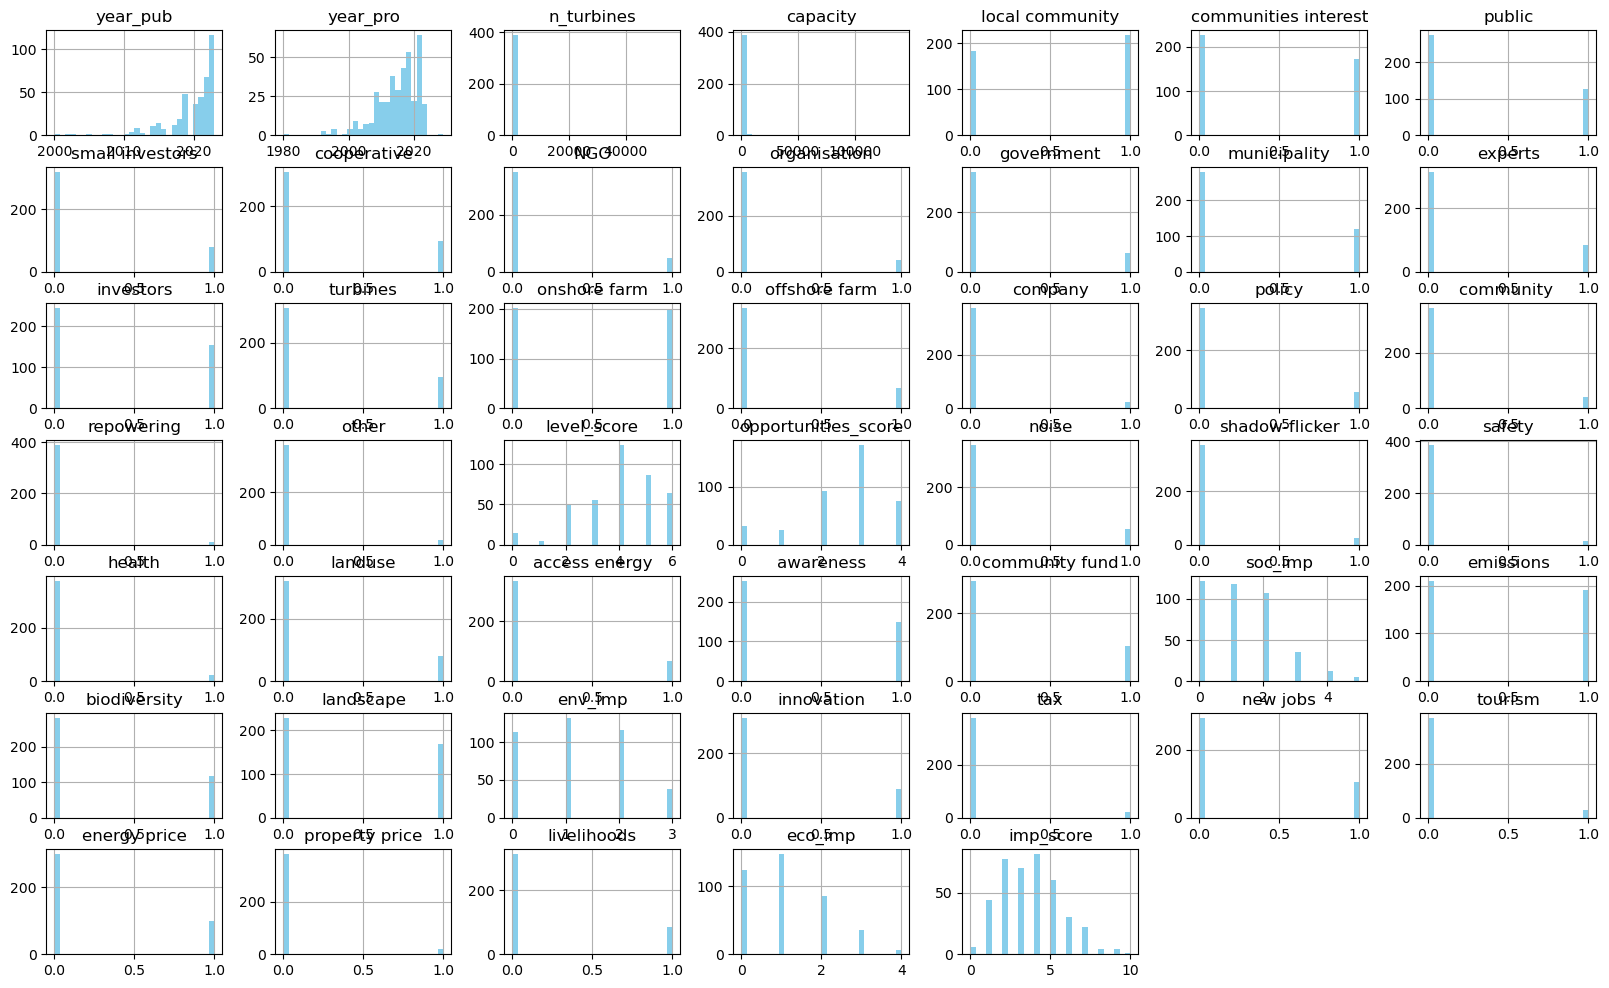

In [35]:
df.hist(bins=30,figsize=(20,12), color = 'skyblue')

In [36]:
#key stats for the level score
print(df['level_score'].std())
print(df['level_score'].max())
print(df['level_score'].min())
print(df['level_score'].mean())

1.4756795060784382
6
0
3.9724310776942358


In [37]:
#key stats for the impact score
print(df['imp_score'].std())
print(df['imp_score'].max())
print(df['imp_score'].min())
print(df['imp_score'].mean())

1.8688770968831432
10
0
3.619047619047619


In [38]:
#key stats for the social impact score
print(df['soc_imp'].std())
print(df['soc_imp'].max())
print(df['soc_imp'].min())
print(df['soc_imp'].mean())

1.1559922933958737
5
0
1.2882205513784462


In [39]:
df['source'].value_counts ()

Journal article          145
Community website         72
Report –  EU project      57
Wiki                      56
News media                26
Blog post                 20
Report – other            15
Thesis                     8
Name: source, dtype: int64

In [40]:
df['cooperation '].value_counts ()

General Assembly                49
Working groups                  12
Transdisciplinary committees     7
Trusted third party              4
Public agreements                3
Personal invite                  3
Name: cooperation , dtype: int64

In [41]:
df['financial '].value_counts ()

Citizen investors         61
Community ownership       40
Compensation              12
Land lease                12
Community Fund             8
Energy discounts           5
Municipal co-ownership     4
Donations                  4
In-kind                    3
Tax revenues               3
Bonus pay                  3
Name: financial , dtype: int64

In [42]:
df['resistance'].value_counts ()

Protests     21
Campaigns    12
Legal        12
Petition      5
Online        4
Sabotage      1
Name: resistance, dtype: int64

In [43]:
df['information'].value_counts ()

Website          21
Dissemination    17
Presentation     17
Inquiries        13
News media       10
Promotions        5
Education         4
Quality label     2
Personal          2
Name: information, dtype: int64

In [44]:
df['consultation '].value_counts ()

Surveys                36
Formal                 25
Hearing                19
Interviews             18
Workshops              16
Community Committee    13
Dialogue                9
Online forums           3
Referendum              2
Citizen Juries          1
Focus groups            1
Name: consultation , dtype: int64

In [45]:
df['region'].value_counts(normalize=True)

Northern Europe    0.223058
Western Europe     0.162907
North America      0.135338
Central Europe     0.110276
Southern Europe    0.107769
Eastern Europe     0.062657
Not Applicable     0.055138
South America      0.052632
Asia               0.040100
Australia          0.027569
Africa             0.022556
Name: region, dtype: float64

#### 5.1 Data Visualizations

For colors, I'm using this color palette from coloors: https://coolors.co/palette/264653-2a9d8f-e9c46a-f4a261-e76f51

Local            0.436090
Regional         0.288221
National         0.218045
Transnational    0.057644
Name: scale, dtype: float64


Text(0.5, 1.0, 'Participatory Practices in Wind Energy by Scale of Governance')

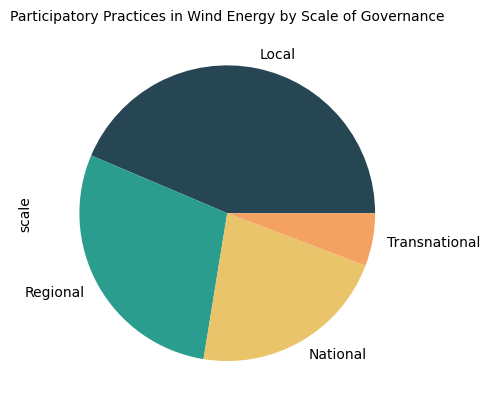

In [46]:
df2 = df['scale'].value_counts(normalize=True)
colors=color=['#264653','#2a9d8f','#e9c46a','#f4a261','#e76f51']

print(df2)

df2.plot.pie(colors=colors)
plt.title('Participatory Practices in Wind Energy by Scale of Governance',fontsize=10)


Onshore Wind        0.711779
Offshore Wind       0.150376
Not Applicable      0.062657
Small Wind          0.040100
On and Offshore     0.035088
Name: technology, dtype: float64


Text(0.5, 1.0, 'Participatory Practices in Wind Energy by Technology')

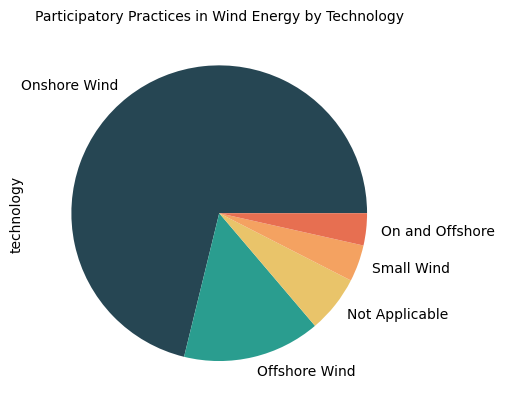

In [47]:
df3 = df['technology'].value_counts(normalize=True)

print(df3)

df3.plot.pie(colors=colors)
plt.title('Participatory Practices in Wind Energy by Technology',fontsize=10)

Journal article          0.363409
Community website        0.180451
Report –  EU project     0.142857
Wiki                     0.140351
News media               0.065163
Blog post                0.050125
Report – other           0.037594
Thesis                   0.020050
Name: source, dtype: float64


Text(0.5, 1.0, 'Source of Documents Reviewed')

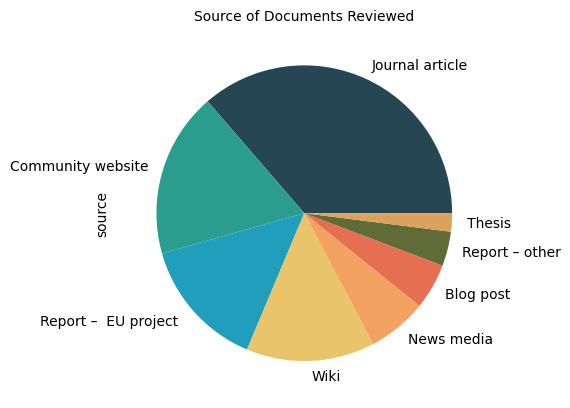

In [48]:
df4 = df['source'].value_counts(normalize=True)
colors=color2=['#264653','#2a9d8f','#219ebc','#e9c46a','#f4a261','#e76f51','#606c38','#dda15e']
print(df4)

df4.plot.pie(colors=colors)
plt.title('Source of Documents Reviewed',fontsize=10)

<AxesSubplot:>

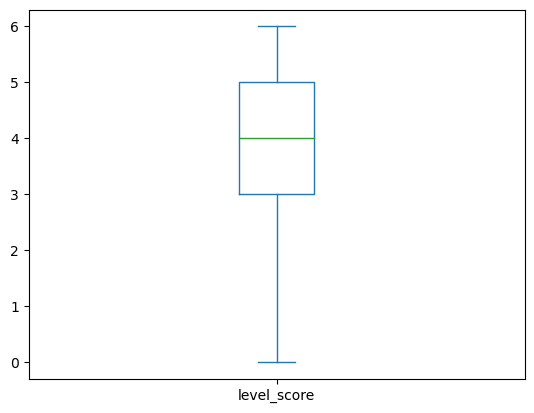

In [49]:
df['level_score'].plot.box()

<AxesSubplot:>

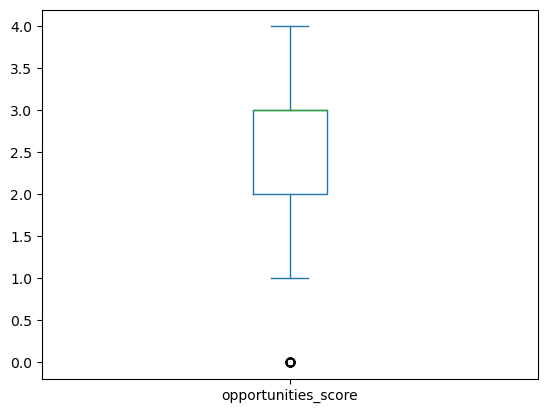

In [50]:
df['opportunities_score'].plot.box()

<AxesSubplot:>

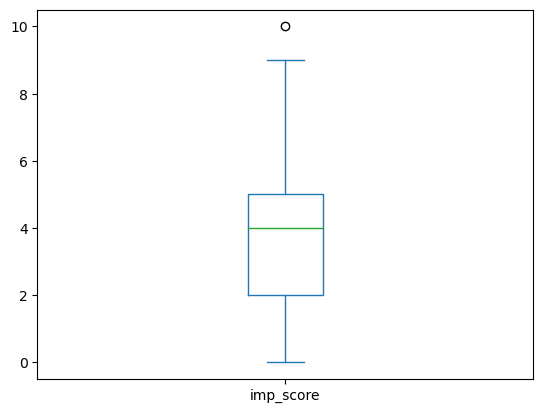

In [51]:
df['imp_score'].plot.box()

In [52]:
#compare top 10 values for region based on level of participation 
top_10 = (
    df                                                                                       
    .groupby('region')['level_score'].mean()                        
    .reset_index()
    .sort_values('level_score', ascending = False)
    .iloc[:10]
)
top_10

,region,level_score
10,Western Europe,4.892308
7,Not Applicable,4.318182
2,Australia,4.272727
3,Central Europe,4.022727
0,Africa,4.000000
6,Northern Europe,3.887640
9,Southern Europe,3.813953
5,North America,3.796296
4,Eastern Europe,3.720000
1,Asia,2.875000


Text(0.5, 1.0, 'Main Level of Participation by Region')

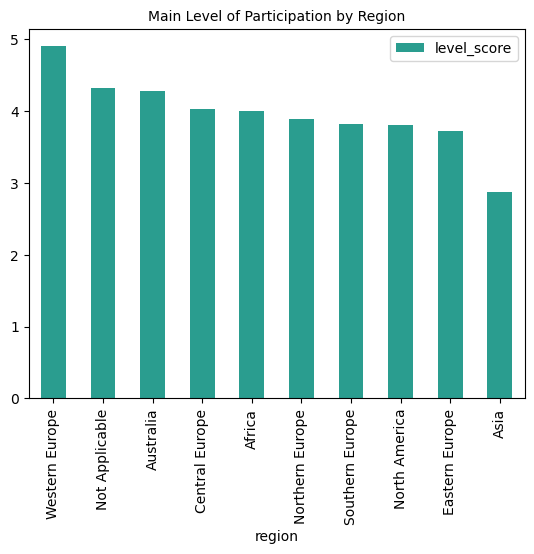

In [53]:
#set a new index to illustrate with bar chart
top_10.set_index('region').plot.bar(color = '#2a9d8f')
plt.title('Main Level of Participation by Region',fontsize=10)

##### 5.2 Check Correlations

In [54]:
#create a subset of the data with just the numeric variables to explore correlations
df_cor=df[['n_turbines','capacity', 'level_score','opportunities_score','soc_imp','env_imp','eco_imp','imp_score']]

In [55]:
#using spearman correlation method, since some variables are ordinal and therefore not normally distributed
df_cor.corr(method='spearman')

,n_turbines,capacity,level_score,opportunities_score,soc_imp,env_imp,eco_imp,imp_score
n_turbines,1.000000,0.964311,-0.219562,-0.155333,-0.087879,0.067048,0.190258,0.098570
capacity,0.964311,1.000000,-0.185896,-0.130254,-0.084491,0.053079,0.202467,0.100386
level_score,-0.219562,-0.185896,1.000000,0.534764,0.149063,-0.223265,0.113506,0.033408
opportunities_score,-0.155333,-0.130254,0.534764,1.000000,0.178414,-0.123741,0.141537,0.113707
soc_imp,-0.087879,-0.084491,0.149063,0.178414,1.000000,0.065096,0.026322,0.639832
env_imp,0.067048,0.053079,-0.223265,-0.123741,0.065096,1.000000,-0.025701,0.553176
eco_imp,0.190258,0.202467,0.113506,0.141537,0.026322,-0.025701,1.000000,0.539764
imp_score,0.098570,0.100386,0.033408,0.113707,0.639832,0.553176,0.539764,1.000000


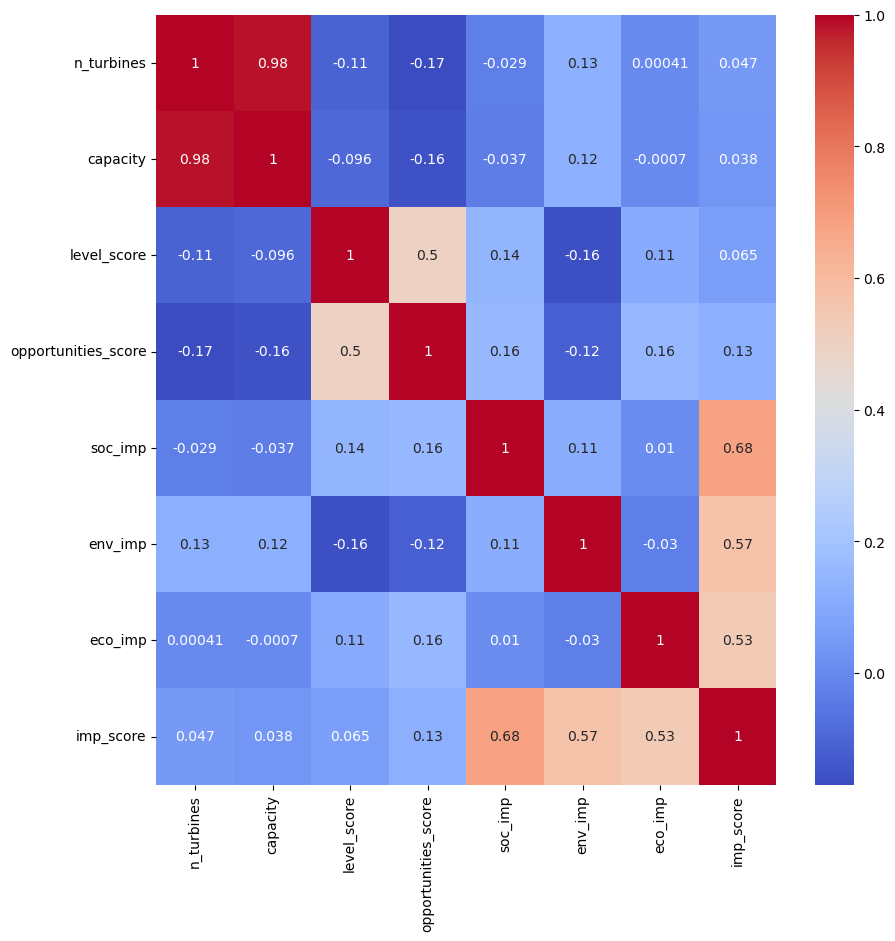

In [56]:
#Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))
#Now create the correlation heatmap in Seaborn, using the 'annot' method to include the coefficients in the heatmap
fig1=sns.heatmap(df_cor.corr(), cmap="coolwarm", annot = True, ax = ax)

The correlation heatmap shows a perfect correlation between installed capacity and turbine number (so these variables are aliases), which is to be expected.There is a moderate correlation between social impacts and the total score for impacts, as well as economic and environmemntal impacts and the total impact score, although the social impacts score has a higher correlation (correlation coefficient is moderate to high - 0.68). There is also a moderate corrrelation (0.5) between the level of participation and the score of opportunities for participation.